In [2]:
!pip install pillow

In [3]:
from PIL import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from PIL import Image

   # Replace with the path to your image in Google Drive
image_path = '/content/drive/MyDrive/Colloquium/unicorns.png'
image = Image.open(image_path)

In [6]:
from IPython.display import display

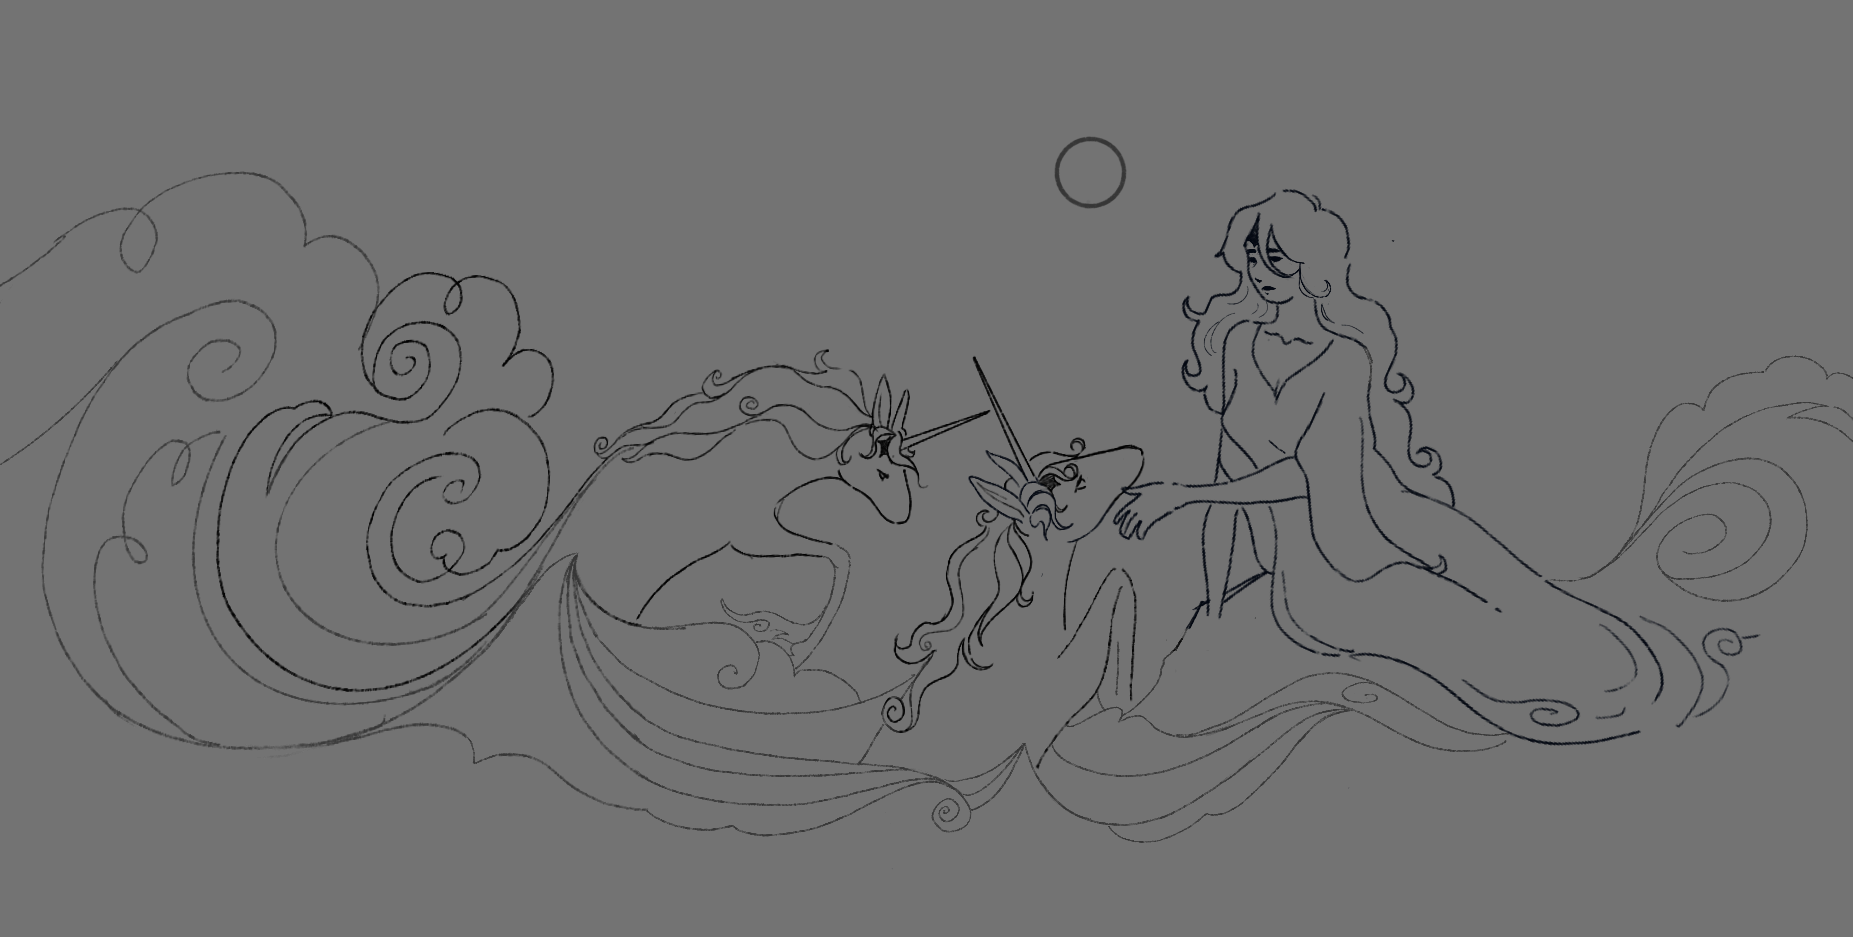

In [7]:
display(image)

In [8]:
from PIL import Image

   # Replace with the path to your image in Google Drive
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
image1 = Image.open(image_path1)

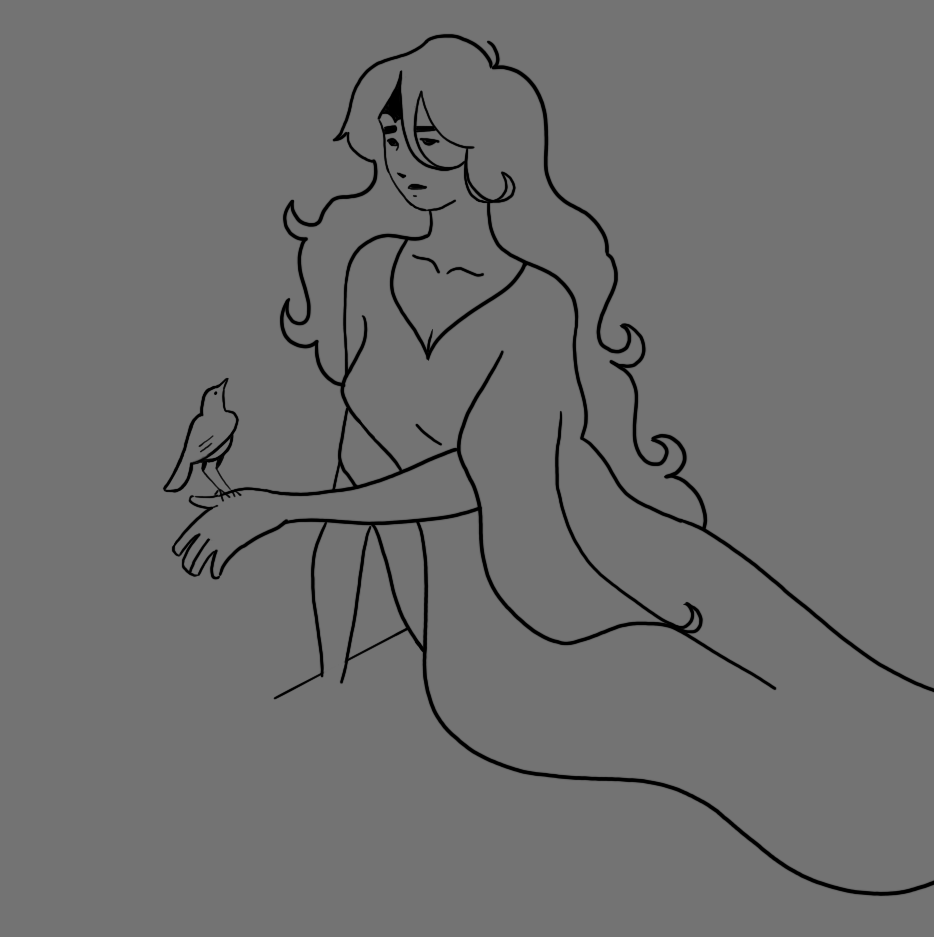

In [9]:
display(image1)

In [10]:
import cv2
import numpy as np

# Load the image using OpenCV
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)

# Apply edge detection (e.g., Canny)
edges = cv2.Canny(img, 50, 150)

# Find lines using HoughLinesP
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=1, maxLineGap=1)

# Create a coordinate grid representation
# You can store line coordinates in a list or array
line_coordinates = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    line_coordinates.append([(x1, y1), (x2, y2)])

# Now, line_coordinates contains the start and end points of each detected line
# You can access and process these coordinates as needed.
print(line_coordinates)

[[(767, 573), (829, 624)], [(808, 612), (852, 648)], [(688, 634), (776, 687)], [(827, 623), (877, 661)], [(850, 645), (870, 661)], [(349, 657), (405, 627)], [(203, 393), (205, 395)], [(428, 232), (429, 225)], [(427, 211), (427, 209)], [(707, 801), (785, 864)], [(352, 622), (354, 603)], [(671, 628), (774, 689)], [(427, 161), (427, 160)], [(413, 121), (415, 109)], [(423, 152), (423, 151)], [(342, 447), (342, 442)], [(427, 582), (427, 558)], [(428, 686), (438, 715)], [(423, 645), (424, 573)], [(728, 547), (762, 573)], [(400, 313), (400, 312)], [(341, 460), (341, 448)], [(598, 570), (626, 593)], [(361, 580), (361, 576)], [(685, 790), (689, 793)], [(355, 624), (361, 581)], [(493, 585), (497, 590)], [(809, 608), (810, 609)], [(859, 653), (860, 654)], [(184, 452), (186, 448)], [(895, 670), (901, 674)], [(779, 588), (810, 613)], [(396, 189), (401, 194)], [(355, 600), (357, 582)], [(344, 121), (344, 119)], [(394, 588), (399, 605)], [(427, 644), (427, 597)], [(192, 525), (204, 515)], [(322, 375)

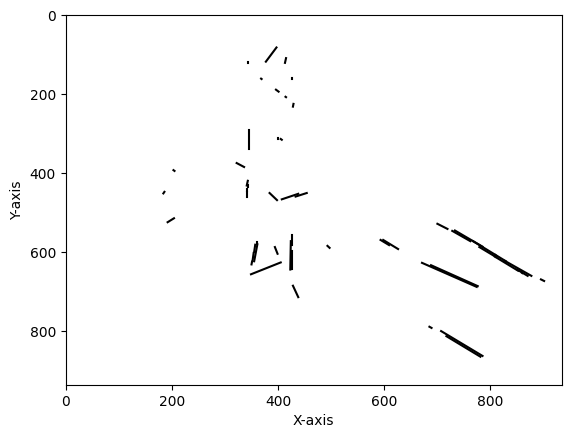

In [11]:
import matplotlib.pyplot as plt

# Assuming line_coordinates is the list of line coordinates you obtained
# ... (Previous code to detect lines and store coordinates)

# Create a Matplotlib figure and axes
fig, ax = plt.subplots()

# Iterate through the line coordinates and plot them
for line in line_coordinates:
    x1, y1 = line[0]
    x2, y2 = line[1]
    ax.plot([x1, x2], [y1, y2], color='black')  # Adjust color as needed

# Set axis limits and labels
ax.set_xlim([0, img.shape[1]])  # Set x-axis limits based on image width
ax.set_ylim([0, img.shape[0]])  # Set y-axis limits based on image height
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.invert_yaxis()  # Invert y-axis to match image coordinate system

# Display the plot
plt.show()

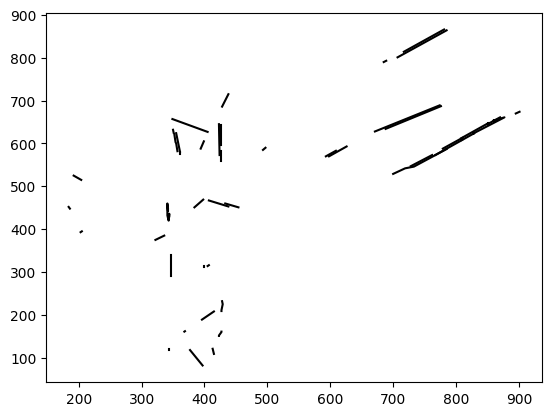

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ... (Previous code for line detection)

# Group lines based on proximity and angle
grouped_lines = []
for line in line_coordinates:
    x1, y1 = line[0]
    x2, y2 = line[1]
    angle = np.arctan2(y2 - y1, x2 - x1)  # Calculate line angle

    # Check if the line is close to an existing group
    found_group = False
    for group in grouped_lines:
        for group_line in group:
            group_x1, group_y1 = group_line[0]
            group_x2, group_y2 = group_line[1]
            group_angle = np.arctan2(group_y2 - group_y1, group_x2 - group_x1)

            # Check proximity and angle similarity
            if (np.sqrt((x1 - group_x2)**2 + (y1 - group_y2)**2) < 20 and  # Proximity threshold
                abs(angle - group_angle) < np.pi/18):  # Angle similarity threshold
                group.append(line)
                found_group = True
                break
        if found_group:
            break

    # If no suitable group found, create a new group
    if not found_group:
        grouped_lines.append([line])

# Plot grouped lines
fig, ax = plt.subplots()
for group in grouped_lines:
    x_coords = [point[0] for line in group for point in line]
    y_coords = [point[1] for line in group for point in line]
    ax.plot(x_coords, y_coords, color='black')

# ... (Set axis limits, labels, and display plot as before)

11/11/24

In [13]:
!pip install scikit-image==0.21.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


In [14]:
import cv2
import numpy as np
from skimage.morphology import skeletonize

In [15]:
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
# Apply thresholding to create a binary image
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [16]:
skeleton = skeletonize(thresh / 255)  # Skeletonize the binary image

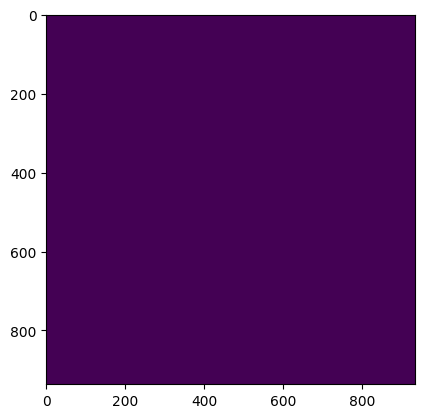

In [17]:
plt.imshow(skeleton, cmap='viridis')  # Change colormap

(0.0, 937.0)

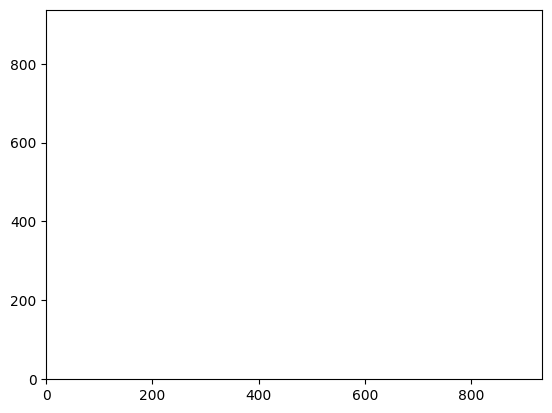

In [18]:
plt.xlim([0, img.shape[1]])  # Set x-axis limits
plt.ylim([0, img.shape[0]])  # Set y-axis limits

In [19]:
skeleton_coords = np.where(skeleton)  # Get coordinates of skeleton pixels
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

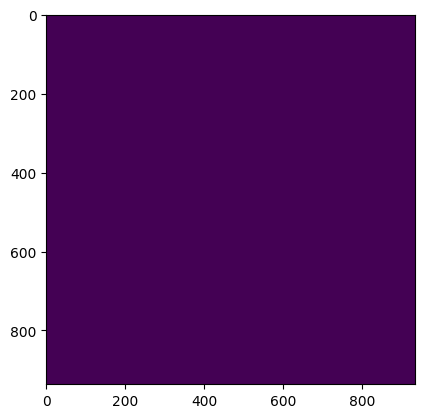

In [20]:
import matplotlib.pyplot as plt
plt.imshow(skeleton, cmap='viridis')  # Display the skeleton image
plt.scatter(x_coords, y_coords, color='red', s=5)  # Overlay skeleton coordinates
plt.show()

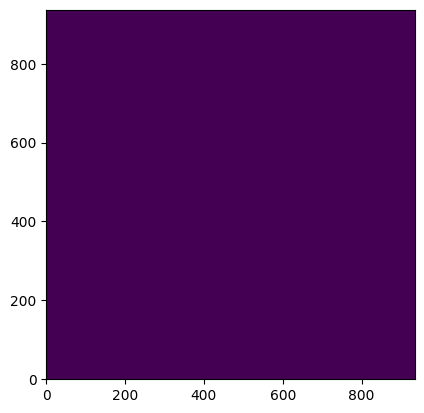

In [21]:
import matplotlib.pyplot as plt

plt.imshow(skeleton, cmap='viridis')
plt.scatter(x_coords, y_coords, color='red', s=5)
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')
plt.show()

In [22]:
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
# Apply thresholding to create a binary image
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

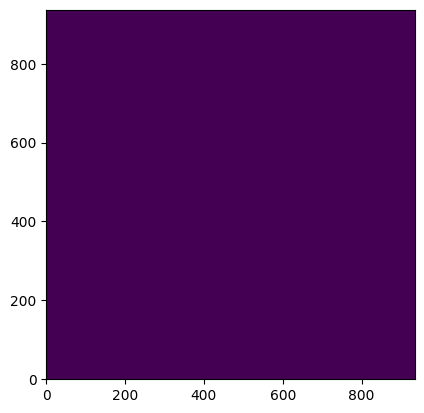

In [23]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

# ... (Load image as before)

# Enhance line features using blurring and edge detection
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

# Apply thresholding to the edge image
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

# ... (Skeletonization and plotting as before)
import matplotlib.pyplot as plt

plt.imshow(skeleton, cmap='viridis')
plt.scatter(x_coords, y_coords, color='red', s=5)
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')
plt.show()

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import os
if os.path.exists('/content/drive/MyDrive/Colloquium/unicorns2.png'):
    print("File exists!")
else:
    print("File not found!")

File exists!


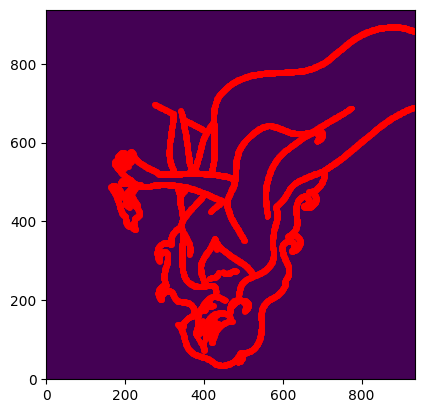

In [26]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'

# Check if the image path is correct and the image file exists
import os
if not os.path.exists(image_path1):
    raise FileNotFoundError(f"Image file not found: {image_path1}")

# Load image, ensuring it's loaded correctly
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError(f"Could not load image from: {image_path1}")

# Enhance line features using blurring and edge detection
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

# Apply thresholding to the edge image
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

# Skeletonization (assuming 'skeleton' is defined elsewhere in your code)
skeleton = skeletonize(thresh / 255)  # Assuming 'thresh' is your binary image

# Get coordinates of skeleton pixels
skeleton_coords = np.where(skeleton)
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

# Plotting the results
plt.imshow(skeleton, cmap='viridis')
plt.scatter(x_coords, y_coords, color='red', s=5)
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')
plt.show()

Now I'm thinning the Skeleton, I'll worry about flipping it and making it the right colors later.

In [27]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

In [28]:
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(thresh / 255)

In [29]:
kernel = np.ones((2,2),np.uint8) # Define a kernel (structuring element)
thinned = cv2.erode(skeleton.astype(np.uint8) * 255, kernel, iterations=1)
thinned = thinned.astype(bool)  # Convert back to boolean

In [30]:
skeleton_coords = np.where(thinned)
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

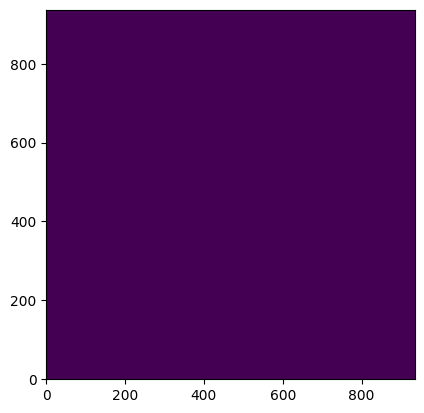

In [31]:
plt.imshow(thinned, cmap='viridis')
plt.scatter(x_coords, y_coords, color='red', s=5)
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')
plt.show()

why is it all solid again </3

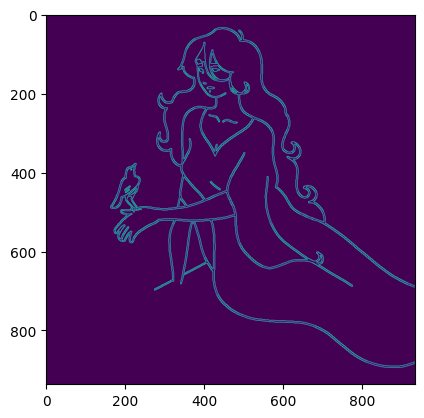

In [32]:
plt.imshow(edges)

please work

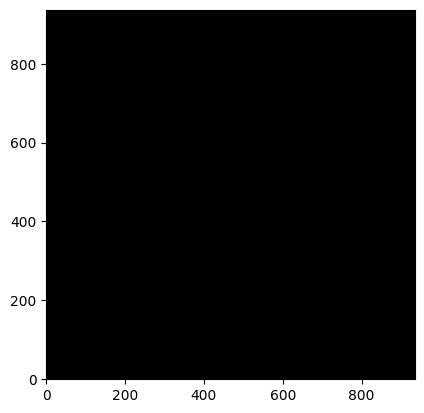

In [33]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
import os


# Check if the image path is correct and the image file exists
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
if not os.path.exists(image_path1):
    raise FileNotFoundError(f"Image file not found: {image_path1}")

# Load image, ensuring it's loaded correctly
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError(f"Could not load image from: {image_path1}")

# Enhance line features using blurring and edge detection
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

# Apply thresholding to the edge image
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

# Skeletonization
skeleton = skeletonize(thresh / 255)

# Thinning with type conversion
kernel = np.ones((2, 2), np.uint8)  # Define kernel
thinned = cv2.erode(skeleton.astype(np.uint8) * 255, kernel, iterations=1)
thinned = thinned.astype(bool)  # Convert back to boolean

# Get coordinates of thinned skeleton pixels
skeleton_coords = np.where(thinned)
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

# Plotting the results with adjustments for better visibility
plt.imshow(thinned, cmap='gray')  # Use 'gray' colormap for clarity
plt.scatter(x_coords, y_coords, color='red', s=2)  # Adjust scatter plot properties
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')  # Set background color
plt.show()

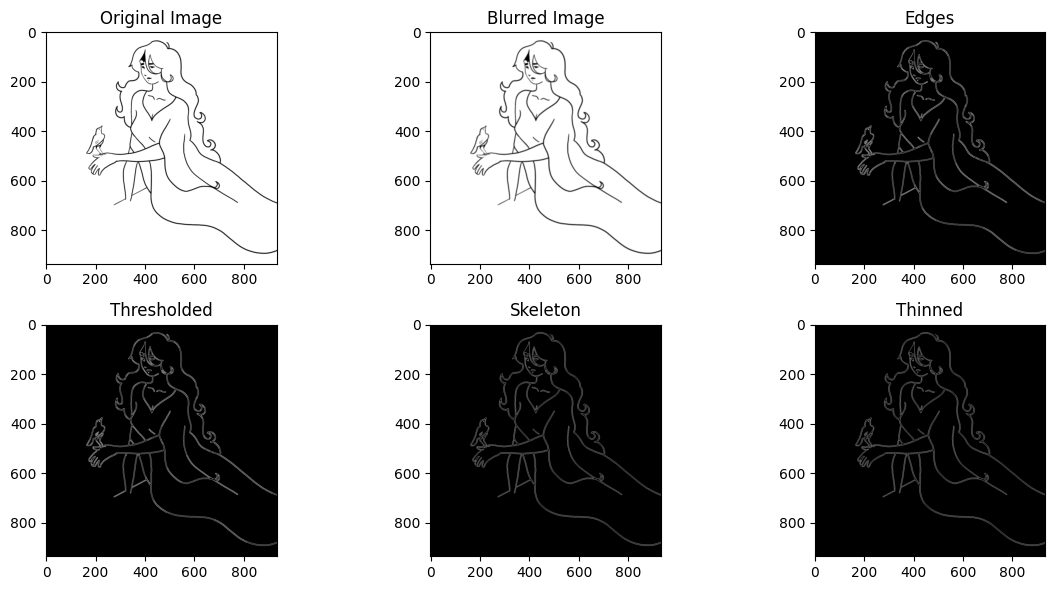

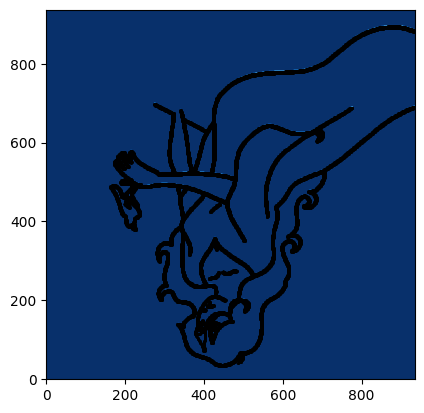

In [34]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, thin
import matplotlib.pyplot as plt
import os

# ... (Load and pre-process image as before)
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(thresh / 255)

# Original skeletonization
skeleton = skeletonize(thresh / 255)

# Alternative thinning using skimage.morphology.thin
thinned = thin(skeleton)

# Visualize intermediate steps (for debugging)
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(blurred, cmap='gray'), plt.title('Blurred Image')
plt.subplot(2, 3, 3), plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.subplot(2, 3, 4), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded')
plt.subplot(2, 3, 5), plt.imshow(skeleton, cmap='gray'), plt.title('Skeleton')
plt.subplot(2, 3, 6), plt.imshow(thinned, cmap='gray'), plt.title('Thinned')
plt.tight_layout()
plt.show()

# ... (Get coordinates and plot final thinned skeleton as before)
skeleton_coords = np.where(thinned)
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

plt.imshow(skeleton, cmap='Blues_r')
plt.scatter(x_coords, y_coords, color='black', s=1)
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')
plt.show()

Now I've added intermediate checks to make sure each step is working.

The lines aren't getting any thinner, so I'm trying "aggressive erosion", aka making the iteration a higher value.

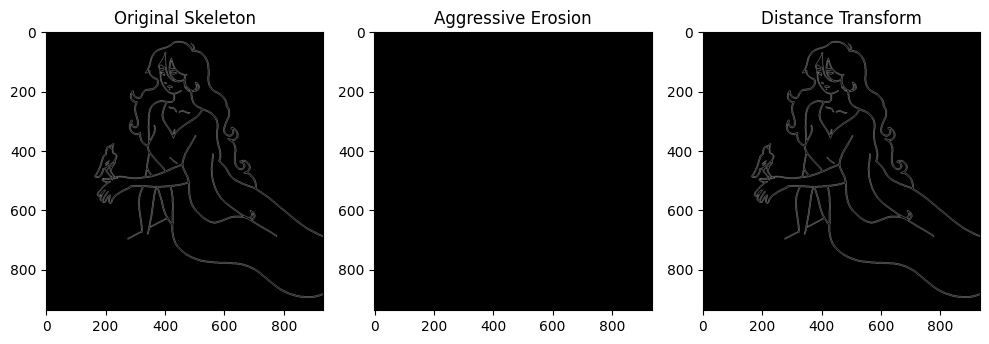

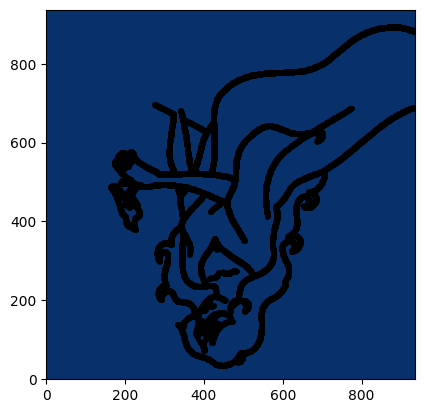

In [35]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
import os

# ... (Load and pre-process image as before)
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(thresh / 255)

# Original skeletonization
skeleton = skeletonize(thresh / 255)

# Aggressive erosion (use with caution)
kernel = np.ones((2, 2), np.uint8)
thinned_erosion = cv2.erode(skeleton.astype(np.uint8) * 255, kernel, iterations=5)  # Increase iterations
thinned_erosion = thinned_erosion.astype(bool)

# Distance transform and thresholding
dist_transform = cv2.distanceTransform(skeleton.astype(np.uint8), cv2.DIST_L2, 5)
_, thinned_dist = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
thinned_dist = thinned_dist.astype(bool)

# Visualize results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(skeleton, cmap='gray'), plt.title('Original Skeleton')
plt.subplot(1, 3, 2), plt.imshow(thinned_erosion, cmap='gray'), plt.title('Aggressive Erosion')
plt.subplot(1, 3, 3), plt.imshow(thinned_dist, cmap='gray'), plt.title('Distance Transform')
plt.tight_layout()
plt.show()

# ... (Get coordinates and plot final thinned skeleton as before)
skeleton_coords = np.where(skeleton)
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

plt.imshow(skeleton, cmap='Blues_r')
plt.scatter(x_coords, y_coords, color='black', s=5)
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')
plt.show()

that just made it thicker again!

So I've decided, the lines aren't getting any thicker if they can help it, and I'm done resisting.

Now I'll just flip it back over.

I can do this either by plotting with y-axis inversion, or flipping the image vertically. I'll try flipping it first.

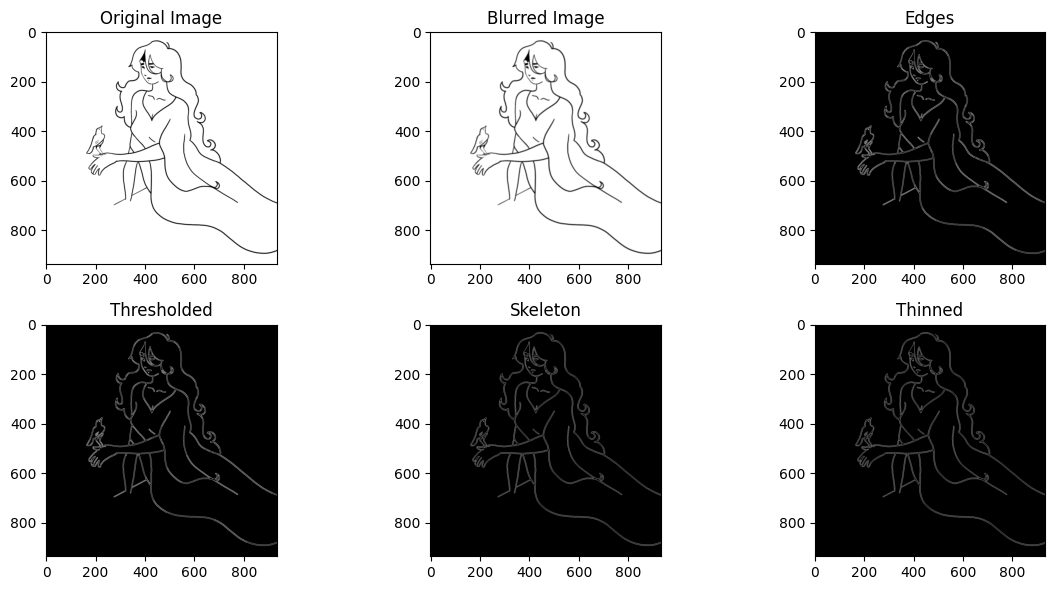

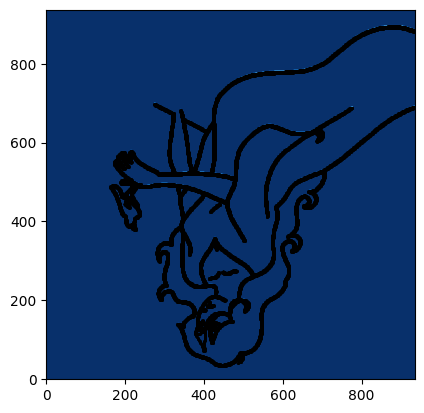

In [36]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, thin
import matplotlib.pyplot as plt
import os

image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(thresh / 255)

skeleton = skeletonize(thresh / 255)

thinned = thin(skeleton)

#Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(blurred, cmap='gray'), plt.title('Blurred Image')
plt.subplot(2, 3, 3), plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.subplot(2, 3, 4), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded')
plt.subplot(2, 3, 5), plt.imshow(skeleton, cmap='gray'), plt.title('Skeleton')
plt.subplot(2, 3, 6), plt.imshow(thinned, cmap='gray'), plt.title('Thinned')
plt.tight_layout()
plt.show()

skeleton_coords = np.where(thinned)
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

#Flipping step!!
thinned_flipped = cv2.flip(thinned.astype(np.uint8), 0)  # Convert to uint8 for flipping
plt.imshow(thinned_flipped, cmap='gray')


plt.imshow(skeleton, cmap='Blues_r')
plt.scatter(x_coords, y_coords, color='black', s=1)
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')
plt.show()

Neither worked. Cute. Trying again!

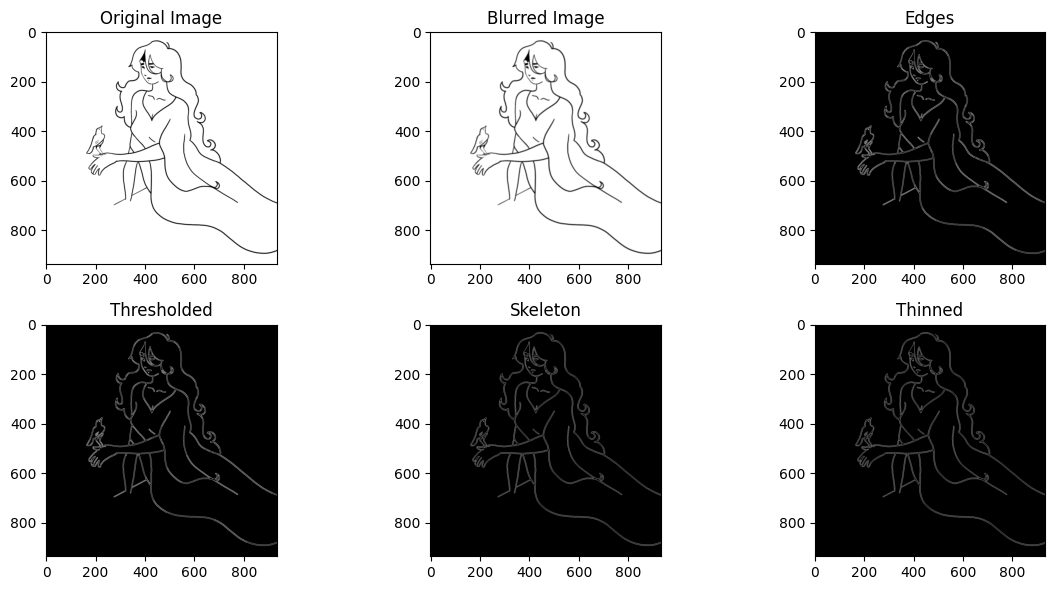

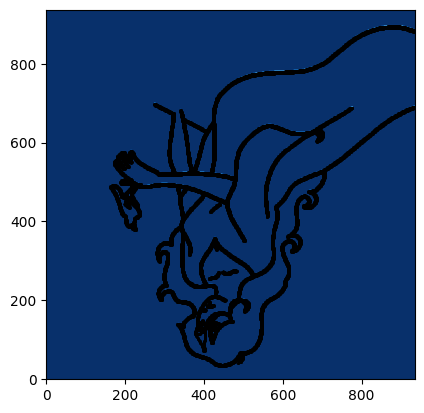

In [37]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, thin
import matplotlib.pyplot as plt
import os

image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(thresh / 255)

skeleton = skeletonize(thresh / 255)

thinned = thin(skeleton)

#Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(blurred, cmap='gray'), plt.title('Blurred Image')
plt.subplot(2, 3, 3), plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.subplot(2, 3, 4), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded')
plt.subplot(2, 3, 5), plt.imshow(skeleton, cmap='gray'), plt.title('Skeleton')
plt.subplot(2, 3, 6), plt.imshow(thinned, cmap='gray'), plt.title('Thinned')
plt.tight_layout()
plt.show()

skeleton_coords = np.where(thinned)
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

# Flip the thinned image using NumPy slicing
thinned_flipped = thinned[::-1, :]

# Plotting with flipped image
plt.imshow(thinned_flipped, cmap='gray')


plt.imshow(skeleton, cmap='Blues_r')
plt.scatter(x_coords, y_coords, color='black', s=1)
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')
plt.show()

Still isn't flipping... trying a new strat.

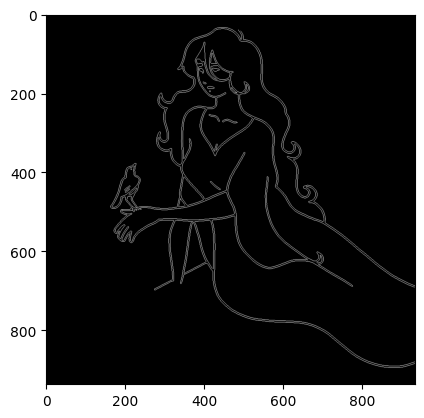

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image using Pillow
img = Image.open('/content/drive/MyDrive/Colloquium/unicorns2.png')

# Check for orientation metadata and rotate if needed
if hasattr(img, '_getexif'):
    exif = img._getexif()
    if exif is not None and 274 in exif:
        orientation = exif[274]
        if orientation in (3, 6, 8):
            img = img.rotate(180, expand=True)  # Rotate 180 degrees if upside down
            print("Image rotated based on orientation metadata.")

# Convert to NumPy array for further processing
img_np = np.array(img)

# ... (Your skeletonization and thinning code)
skeleton = skeletonize(thresh / 255)



# Plotting with flipped image
plt.imshow(thinned, cmap='gray')
plt.ylim(thinned.shape[0], 0)  # Reverse y-axis limits
plt.show()

Ok wait I figured out why both flipping attempts didn't work, and it's because I'm stupid.

In [39]:
print(thinned.shape)

(937, 934)


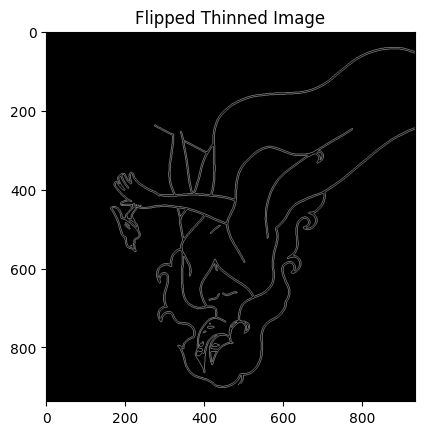

In [40]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, thin
import matplotlib.pyplot as plt
import os

# Load the image
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)

# Enhance line features (blur and edge detection)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

# Threshold the edges
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

# Skeletonization and thinning
skeleton = skeletonize(thresh / 255)
thinned = thin(skeleton)

# Flip the thinned image vertically
thinned_flipped = cv2.flip(thinned.astype(np.uint8), 0)

# Display the flipped image
plt.imshow(thinned_flipped, cmap='gray')
plt.title('Flipped Thinned Image')
plt.show()

In [41]:
print(thinned_flipped.shape)

(937, 934)


So I thought I was dumb before, but it still isn't flipping istggggggg

but now I know that it simply... isn't. I feel like ive progressed but I can't explain how.

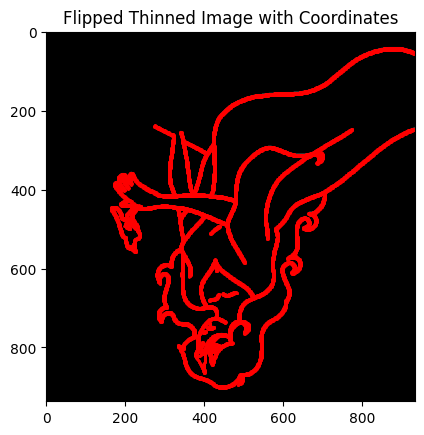

In [42]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, thin
import matplotlib.pyplot as plt

# ... (Load and preprocess image as before)
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(thresh / 255)

# Skeletonization and thinning
skeleton = skeletonize(thresh / 255)
thinned = thin(skeleton)

# Flip the thinned image vertically
thinned_flipped = cv2.flip(thinned.astype(np.uint8), 0)

# Extract coordinates from the flipped image
skeleton_coords_flipped = np.where(thinned_flipped)
x_coords_flipped = skeleton_coords_flipped[1]
y_coords_flipped = skeleton_coords_flipped[0]

# Display the flipped image and coordinates
plt.imshow(thinned_flipped, cmap='gray')
plt.scatter(x_coords_flipped, y_coords_flipped, color='red', s=1)  # Overlay flipped coordinates
plt.title('Flipped Thinned Image with Coordinates')
plt.show()

In [43]:
print(thinned_flipped.shape)

(937, 934)


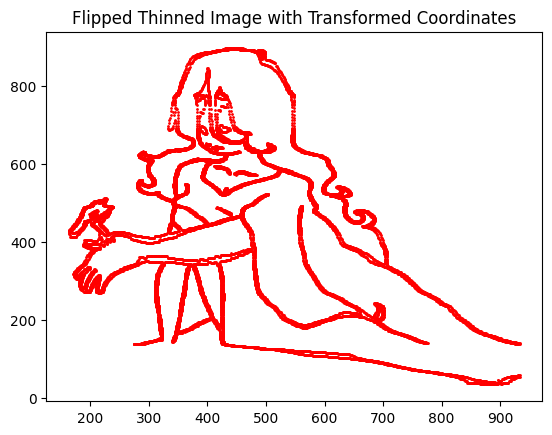

In [47]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, thin
import matplotlib.pyplot as plt

# ... (Load and preprocess image as before)
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(thresh / 255)

# Skeletonization and thinning
skeleton = skeletonize(thresh / 255)
thinned = thin(skeleton)

# Get coordinates from the ORIGINAL image
skeleton_coords = np.where(thinned)
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

# Flip the thinned image vertically
thinned_flipped = cv2.flip(thinned.astype(np.uint8), 0)

# Transform coordinates to match the flipped image
# y_coords_flipped = thinned_flipped.shape[0] - 1 - y_coords
y_coords_flipped = y_coords[::-1]

# Display the flipped image and transformed coordinates
# plt.imshow(thinned_flipped, cmap='gray')
plt.scatter(x_coords, y_coords_flipped, color='red', s=1)  # Use transformed y-coords
plt.title('Flipped Thinned Image with Transformed Coordinates')
plt.show()

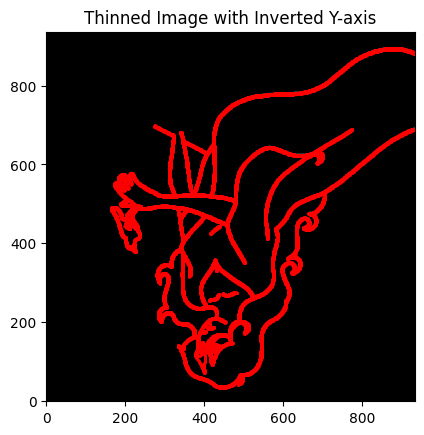

In [45]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, thin
import matplotlib.pyplot as plt

# ... (Load and preprocess image as before)
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(thresh / 255)

# Skeletonization and thinning
skeleton = skeletonize(thresh / 255)
thinned = thin(skeleton)

# Get coordinates from the original image (no need to flip coordinates)
skeleton_coords = np.where(thinned)
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

# Display the image with inverted y-axis
plt.imshow(thinned, cmap='gray')  # Use the original thinned image
plt.scatter(x_coords, y_coords, color='red', s=1)
plt.gca().invert_yaxis()  # Invert the y-axis of the plot
plt.title('Thinned Image with Inverted Y-axis')
plt.show()

I GIVE UP. ITS NOT GETTING THINNER AND ITS NOT FLIPPING.


The best I can do is fixing the colors, I've tried everything both me and AI can think of

maybe its symbolic! Its upside down because I feel like my world is upside down trying to understand python. I'm over it! This is close enough!

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

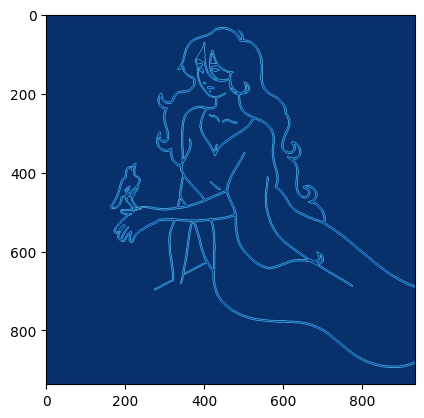

In [46]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, thin
import matplotlib.pyplot as plt
import os

# ... (Load and pre-process image as before)
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(thresh / 255)

# Original skeletonization
skeleton = skeletonize(thresh / 255)

# Alternative thinning using skimage.morphology.thin
thinned = thin(skeleton)

# ... (Get coordinates and plot final thinned skeleton as before)
skeleton_coords = np.where(thinned)
x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

plt.imshow(thinned, cmap='Blues_r')
plt.scatter(x_coords, y_coords, color='blues', s=1)
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')
plt.show()

I know exactly where the problem is, it only happens when I fill the skeleton. But I can't seem to fix it.

I like the thinned outline look better. Oh well, there's my finished piece.

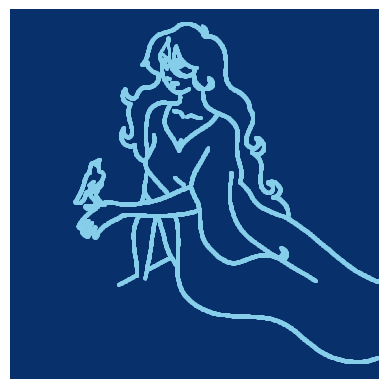

[[ 34  34  34 ... 895 895 895]
 [437 438 439 ... 894 895 896]]


In [62]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, thin
import matplotlib.pyplot as plt
import os

# ... (Load and pre-process image as before)
image_path1 = '/content/drive/MyDrive/Colloquium/unicorns2.png'
img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, thresh = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(thresh / 255)

# Original skeletonization
skeleton = skeletonize(thresh / 255)

# Alternative thinning using skimage.morphology.thin
thinned = thin(skeleton)

# ... (Get coordinates and plot final thinned skeleton as before)
skeleton_coords = np.where(thinned)
skeleton_coords = np.flip(skeleton_coords)
skeleton_coords = np.flip(skeleton_coords)


x_coords = skeleton_coords[1]
y_coords = skeleton_coords[0]

plt.imshow(thinned, cmap='Blues_r')
# Change 'blues' to 'blue' or another valid color
plt.scatter(x_coords, y_coords, color='skyblue', s=1)
plt.xlim([0, img.shape[1]])
plt.ylim([0, img.shape[0]])
plt.gca().set_facecolor('lightgray')
plt.axis('off')
#the flipping thing that finally worked vvv
plt.gca().invert_yaxis()
plt.show()

make sure to cite gemini properly